### **Pandas Dataframes**
Pandas stands for "Panel Data", where "panel" basically means *table* or *spreadsheet*,  
that is, data arranged in rows and columns.  
- In Pandas, this spreadsheet-like data structure is called a **dataframe**.
- Unlike a spreadsheet, such as an Excel worksheet, a Pandas dataframe exists as a *variable*.  
- A dataframe is a two-dimensional **matrix** of rows and columns, having a **shape** property,  
 as a **tuple**. A 10-row x 4-column dataframe has a shape of (10, 4)
- A single row or column of a dataframe exists as a one-dimensional vector, called a **Series**.
- Numpy terms such as shape, dimensions, matrix, vector and tuple apply to dataframes, too,  
because Pandas is built on top of Numpy.  
- Like Numpy, Pandas must be imported.

In this lesson, we will learn how to:
- make a Pandas dataframe from multiple lists, one list per column
- make a Pandas dataframe from a dictionary, where each key value is a list
- select ranges of dataframe rows and/or columns by index number
- select ranges of dataframe rows and/or columns by column name
- use **loc** and **iloc** syntax to select data
- filter data based on a condition
- filter data based on multiple conditions
- add rows of data to an existing dataframe
- add columns to an existing dataframe
- get / set individual values from a dataframe
- make a Pandas Series (1D data structure) from a 2D Dataframe
- use **list()** and **tolist()** methods to convert a Numpy array or Panda Series to a list

**Pandas DataFrame**: two-dimensional data structure, consising of rows and columns.

- Dataframes are often made from loaded data, such as from a **CSV** file,  
but they can be made from lists, arrays or dictionaries, which is how we will start.
- **DataFrame()** method returns a dataframe
- if provided no arguments, DataFrame() returns a new, empty dataframe
- DataFrame() can takes a 2D array or a dictionary as its argument,  
in which case it returns a dataframe with data already in it

In [ ]:
# if import pandas doesn't work:
%pip install pandas
# %pip install IPython.display
# ON LOCAL MACHINE (e.g. VSCode NOT Google Colab)
# You MAY need to INSTALL -- NOT just IMPORT numpy and/or pandas
# Which MAY result in ERROR, which can be troubleshot as follows:
# if installing pandas doesn't work
# uninstall numpy and pandas and then
# FORCE reinstall both, clearing all cache:
# %pip uninstall -y numpy pandas
# %pip install numpy pandas --no-cache-dir --force-reinstall

In [679]:
# 0. import modules:
import numpy as np
import pandas as pd
from IPython.display import Image
import random
import string # for auto-generating sequences of letters (a-z, A-Z)
import pprint as pp
import sys

In [ ]:
# print the version of numpy:
# versions 2+ prints 21 (and other numbers) like so: np.int64(21)
# BUT we just want 21 to print as 21
# so check version of Numpy:
print(np.__version__, sys.version)

1.23.5 3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]


In [681]:
# if numpy version is 2+, set it lower to fix annoying printing of numbers:
np.set_printoptions(legacy='1.23.5')

/var/folders/js/zv6c_nmx1vbdnr3f03zqdsc00000gn/T/ipykernel_45480/2970553453.py:2: UserWarning: legacy printing option can currently only be '1.13', '1.21', or `False`
  np.set_printoptions(legacy='1.23.5')


In [653]:
# 1. make a numpy array of consecutive integers from 21-84; 
#    reshape (64,) vector into (8,8) matrix
chessboard_arr = np.arange(21,85).reshape(8,8)
print(chessboard_arr.shape)
print()
print(chessboard_arr)

(8, 8)

[[21 22 23 24 25 26 27 28]
 [29 30 31 32 33 34 35 36]
 [37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52]
 [53 54 55 56 57 58 59 60]
 [61 62 63 64 65 66 67 68]
 [69 70 71 72 73 74 75 76]
 [77 78 79 80 81 82 83 84]]


In [654]:
# 3. Make a Pandas DataFrame from the chessboard array:
chessboard_df = pd.DataFrame(chessboard_arr)

In [655]:
# 4. Output -- don't print -- the df:
print(chessboard_df.shape, chessboard_df.ndim) # (8, 8) 2
chessboard_df

(8, 8) 2


0   1   2   3   4   5   6   7
0  21  22  23  24  25  26  27  28
1  29  30  31  32  33  34  35  36
2  37  38  39  40  41  42  43  44
3  45  46  47  48  49  50  51  52
4  53  54  55  56  57  58  59  60
5  61  62  63  64  65  66  67  68
6  69  70  71  72  73  74  75  76
7  77  78  79  80  81  82  83  84

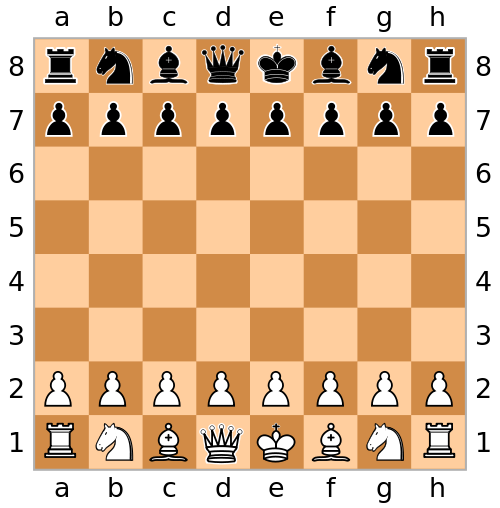

In [656]:
Image("https://static.guides.co/a/uploads/1194%2F500px-Chess_board_blank.svg.png")

In [660]:
# 5. Make the chessboard df again, but this time
#.   supply column headers as letters from a-h
#    also, number the rows from 1-8 in descending order
col_names = ['a','b','c','d','e','f','g','h']
row_names = [8,7,6,5,4,3,2,1]

chessboard_df = pd.DataFrame(chessboard_arr,
        columns=col_names, index=row_names)

chessboard_df

a   b   c   d   e   f   g   h
8  21  22  23  24  25  26  27  28
7  29  30  31  32  33  34  35  36
6  37  38  39  40  41  42  43  44
5  45  46  47  48  49  50  51  52
4  53  54  55  56  57  58  59  60
3  61  62  63  64  65  66  67  68
2  69  70  71  72  73  74  75  76
1  77  78  79  80  81  82  83  84

In [671]:
# challenge: make this list w code: [8,7,6,5,4,3,2,1]
row_names_dynamic = list(range(8,0,-1))
print(row_names_dynamic)

[8, 7, 6, 5, 4, 3, 2, 1]


#### **string module**.
```python
import string
```
The string module is for dynamically generating sequences of letters and digits:

string.ascii_lowercase → 'abcdefghijklmnopqrstuvwxyz'

string.ascii_uppercase → 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

string.ascii_letters → lowercase + uppercase (ascii_lowercase + ascii_uppercase)

string.digits → '0123456789'

In [672]:
# 7. Make the chessboard df again, but this time
#.   supply column headers as letters from a-h dynamically
# list('apple') => ['a','p','p','l','e']
col_names_dynamic = list(string.ascii_lowercase[:8])
print(col_names_dynamic)
#.   using the string.lower_case (or string.letters)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']


In [673]:
chessboard_df = pd.DataFrame(chessboard_arr,
                columns=col_names_dynamic,
                index=row_names_dynamic)

chessboard_df

a   b   c   d   e   f   g   h
8  21  22  23  24  25  26  27  28
7  29  30  31  32  33  34  35  36
6  37  38  39  40  41  42  43  44
5  45  46  47  48  49  50  51  52
4  53  54  55  56  57  58  59  60
3  61  62  63  64  65  66  67  68
2  69  70  71  72  73  74  75  76
1  77  78  79  80  81  82  83  84


### **df.iloc[row_index,col_index]**  
gets a dataframe row as **series**.  
The single square brackets indicate a 1D selection
**iloc** stands for *integer location*

In [678]:
# 8 Get the first row as a Series (1D vector)
first_row_series = chessboard_df.iloc[0]
print(first_row_series.shape) # (8,) 1
print()
print(first_row_series)
print()
print("List:", list(first_row_series))
print()
print("Dict:", dict(first_row_series))


(8,)

a    21
b    22
c    23
d    24
e    25
f    26
g    27
h    28
Name: 8, dtype: int64

List: [21, 22, 23, 24, 25, 26, 27, 28]

Dict: {'a': 21, 'b': 22, 'c': 23, 'd': 24, 'e': 25, 'f': 26, 'g': 27, 'h': 28}


In [537]:
# 9. Get the first row as its own DataFrame (matrix 2D): df.iloc[row_index,col_index] 

print() # (1, 8) 2


In [538]:
# 10. Get the last row as its own df: df.iloc[row_index,col_index]

print() # (1, 8)


In [539]:
# 11. Make new df of middle 4 rows (all cols)
# so, all but first and last 2 rows:
# df.iloc[row_start_index:row_end_index_excl,start_col_index:end_col_index_excl]
# [row_range,:] means row range, all columns
# [:,col_range] means all rows, col range

print() # (4, 8)



In [540]:
# 12. Challenge: Make new df of middle 4 rows middle 4 cols

print() # (4,4) 2



In [541]:
# 13. Challenge: make a new df called ttt_ur_df
# as tic-tac-toe board using upper right 3x3 corner of the chessboard
# chessboard_df.iloc[first_3_rows,last_3_cols]


In [542]:
# 14. Make a DF of every other row using step (2)


In [543]:
# 15. Challenge: Make a DF of every other row AND every other col?
# 4x4 : rows: 8,6,4,2 cols: a c e g
# ever
 

In [544]:
# 16. Set the middle 4 rows, all squares, to empty spaces
# (like a chessboard at start of game)


In [545]:
# che

In [546]:
# 17. Set the pawn rows to "P"
# (like a chessboard at start of game)
# for rows that are not contiguous (not consecutive)
# specify rows as a list, in this case [1,6]
# che

In [547]:
# che

In [548]:
# 18. Set the 4 corners to "R" (for rook)
# (like a chessboard at start of game)
# che

In [549]:
# 19. Set the Knights, as "Kn", next to each rook
# (like a chessboard at start of game)
# che
 

In [550]:
# 20. Clallenge: set the Bishops, as "B", next to each Knight
# (like a chessboard at start of game)
# che

In [551]:
# 21. Clallenge: set the Kings and Queens to "K" and "Q":
# che

**Starting with a new, empty DataFrame**.  

- You can make a new, empty dataframe, and then assign the data after the fact.
- The data can be assigned as lists, one per column.
- The list length results in that many rows in the dataframe.
- To avoid ragged rows problem, make sure all lists are of equal length

In [552]:
# 22. Using the provided raw data, declare 4 lists of 4 items each
# "T-Bone Steak","Pizza","Hamburger","Garden Salad"
# 49.99, 19.99, 15.75, 12.99
# 700, 500, 600, 350
# False, False, False, True

In [553]:
# 23. Declare a new empty dataframe
# fo

In [554]:
# 24. Declare columns for the DF, to do so, put df["new col"] and assign list; length of lists must all be equal and must equal number of rows
# food_df

In [555]:
print()
# foo

In [556]:
# 25. Challenge: get the pizza row -- the result is a 1D Series
# piz

print() # (4,) 1
print()

# make a list from the series -- this purges the col names, leaving just the values
# piz
print() # ['Pizza', 19.99, 500, False]

# make a dict from the series -- this uses the col names as the keys
# piz
print() # {'Item': 'Pizza', 'Price': 19.99, 'Cals': 500, 'Vegan': False}

### **df.iloc[[num]]**  
- To get a dataframe slice as a 2D dataframe--not just as a 1D series--use iloc with double square brackets.  
- The **[ [ num ] ]** indicate a 2D selection

In [557]:
# 26. Get the pizza row using .iloc -- BUT as a 2D DataFrame (1,4)
# the way to go from series to df is to use double [[]]
# pizza_df = food_df.iloc[[1]]
# this way also works
print() # (1,4) 2
# pi

### **df.iloc[row,col]**
To get an individual piece of data, look it up by row and column as you would in a Numpy array

In [558]:
# 27. Get the pizza row using .loc
# food

### **df.loc[row_name,col_name]** for selecting by names, rather than index numbers
- **loc** stands for *location*
- if the row names are the same as row index, use index number for rows

In [559]:
# 28. Using iloc, get the first 3 rows and first 3 cols of food_df:
# (all cols except vegan):
# food_

In [560]:
# 29. Except same thing as above BUT using loc:
# get the first 3 rows, first 3 cols
# iloc is exclusive, but loc is inclusive, so just go to row 2
# fo

In [561]:
# 30. Using .iloc on food_df, get first 2 rows, first 2 cols
# fo

In [562]:
# 31. Do the .loc version of the above (first 2 rows, first 2 cols)
# fo

**selecting non-contiguous rows and non-contiguous columns**  
- **df.iloc[[row_index,row_index],[col_index,col_index]]**
- **df.loc[[row_name,row_name],[col_name,col_name]]**
- pass in lists of row and column indexes

In [563]:
# 32. Using loc get first 2 rows, but non-contiguous cols: "Item" and "Cals"
# foo

In [564]:
# 33. Using iloc get first 2 rows, but non-contiguous cols: "Item" and "Cals"
# fo

In [565]:
# 34. Using loc get non-contiguous first and last rows, "Item" and "Cals" cols
# foo

In [566]:
# 35. Using iloc get non-contiguous first and last rows, "Item" and "Cals" cols
# fo

### **Selecting DataFrame rows by column value condition**
**new_df = df[ df['col_name'] boolean_condition ]**
- to select only rows where a specific column values meets a condition,  
put the column and condition inside square brackets
- the condition is expressed as a **boolean comparison (==, <, >, <=, >=, !=)**
- every row where the column boolean comparison is **True** is included in the result

In [567]:
# 36. Get all food_df rows of max 500 cals
# foo   

In [568]:
# 37. Get only non-vegan food items:
# food

In [569]:
# 38. Use ~ tilda in front of ~df["col_name"] condition
# to get all rows where the condtion is False
# get all NON-Vegan rows:
# food

**adding a new row to a dataframe**
- **df.loc[num]** for location indicates a row number
- specify the new next row number and set it equal to a list of values, one per column

In [570]:
# 39. Make a new_item list to add to the food_df
# "Fruit Salad", 13.50, 320, True

In [571]:
print()
# new_

In [572]:
# 40. Add the new item to the end of the food_df
# foo

In [573]:
# 41. Add Bison Burger to the df at next available row position
# "Bison Burger", 18.50, 820, False
 

In [574]:
# 42. Increase the new item price by $1 with += operator:
# fo

In [575]:
# 43. Increase the Pizza calories by 10% (from 500 to 550)
# foo

In [576]:
# 44. Change name of steak to "Ribeye Steak"
# foo

**len(df)** returns the number of rows in a dataframe.  
- **len(df)** is more dynamic than hard-coding the row number
- row indexing starts at 0, so the length of the df equals the next row index

In [577]:
# 45. Add a new row to the food_df by dynaically using len(food_df)
print('num rows:')
# "Caesar Salad", 14.75, 580, False

num rows:


In [578]:
# 46. Get rid of last row:
# foo

In [579]:
# fo

**using a loop to add multiple rows to a df**
- row data exists as list of lists
- each list is one row: [Food, Price, Cal, Vegan]
- iterate the list with a for loop
- each time through the loop, make a new row at index equal to current df len

In [580]:
# 47. Make a list of lists of 3 new items to add to the food_df:
# "Chicken Salad", 12.95, 700, False
# "Chef Salad", 14.95, 600, False
# "Big Kahuna Burger", 17.95, 1200, False

In [581]:
# 48. Loop the new items, adding the current item
# to the food_df each time as a new row 
# for

In [582]:
# fo

### **Dynamic Look Up of Row by Value Condition** scenario: 
- "Chef Salad" to ""House Salad" 
- rather than hard-code row 8, find row 8 as value condition
    - **food_df["Item"]=="Chef Salad"** is **True** for row 8 (only)
    - **food_df.loc[food_df["Item"]=="Chef Salad","Item"] = "House Salad"**

In [583]:
# 49. Change "Chef Salad" to "House Salad"
# rather than hard-code the row number (8), better would be to
# dynamically look up the row w the "Chef Salad"
# to to this, put a boolean for the row number:
# foo

In [584]:
# foo

In [585]:
# 50. Get just items with price of 15+:
# foo

In [586]:
# 52. Get stats on numeric columns
# fo

In [587]:
# food

### **df.at[row_name,col_name]** alternative to .loc
### **df.iat[row_index,col_index]** alternative to .iloc

In [588]:
# foo


In [589]:
# fo

In [590]:
# foo

In [591]:
# fo

### **df[ df['col'] == 'salad' ]**
- finds all *exact matches* of 'salad' in col
### **df[ df['col'].str.contains('salad') ]**
- finds all *partial matches* of substring 'salad' in col
### **df[ df['col'].str.contains('salad', case=False) ]**
- finds all case-insensitive *partial matches* of substring 'salad' in col

In [592]:
# get all the 'salad' rows via exact match -- is case-sensitive
# sal

In [593]:
# sal

In [594]:
# to get ALL the salads, use str.contains("salad", case=False)
# sal

In [595]:
# Challenge: get all the burgers into a new df called burgers_df
# burg
 

### **df['col_name'] = df['col_name'].str.replace('salad', 'ensalada', case=False)**
- replaces all occurences of 'salad' with 'ensalada'
- then change back to 'salad'

In [596]:
# food

In [597]:
# food_d

In [598]:
# foo

### **making a DataFrame from a Dictionary**
- keys are automatically used as the df's column headers

In [599]:
# sandwiches dictionary from 5 lists of equal length
# "Turkey Sandwich", "Tuna Salad Sandwich", "BLT", "Reuben", "Hot Dog", "Falafel"
#  9.95, 8.95, 9.75, 12.95, 4.95, 11.95
#  590, 620, 780, 900, 370, 500
#  False, False, False, False, False, True
#  "Whole Wheat", "Rye", "White", "Rye", "Bun", "Pita"


In [600]:
# pp

In [601]:
# make a df from the dict; the keys will be used as the col names:
# san

In [602]:
print() # (6, 5)
# san

**main_df = pd.concat([main_df, df_to_add])**.

**Concatenating two dataframes together**
- add the new **sandwiches_df** dataframe to the original **food_df**
- the result will be six new rows in the **food_df**
- this will mess up the index numbering, which will start over from 0 with the sandwiches

In [603]:
# concat the sandwiches df onto the food df
# main_df = pd.concat([main_df, df_to_add]).
# foo

In [604]:
print()
# fo

### Cleaning Data: missing (null / NaN) values can be dealt with in 1 of 3 ways:

- 1. if the col is rife with bad values, perhaps just delete entire col
- 2. in this case, we will keep the "Bread" col; there are two options for keeping a col:
    - fill with some default number, such as 0 or the mean
    - fill with some default name if it's a string
    - locate the correct values and fill with those
- 3. **fillna()** in case of string or val w no mean, fill w some arbitrary default val  : **df["col_name"] = df["col_name"].fillna("filler value")**
- **df.info()** gives report of cols with non-null count (not missing)
- **df.isna().sum()**  gives report of cols with null count (missing)
- **df.describe()**  gives stats report of numeric cols (min, max, std)

In [605]:
# fo

In [606]:
# fill all missing bread (NaN) with "roll"
# food_df["Bread"] = food_df["Bread"].fillna("Roll")

In [607]:
# f

In [608]:
# the following works, but is unconditional -- every NaN is filled w "Roll"
# BUT what if we wanted to conditionally fill NaN, so 'burger' gets 'bun'
# and everything else would get a roll
# foo

In [609]:
# food_

**df.reset_index() method for resetting row index numbers**.
- concatenating two dataframes into one messes up the consecutive row indexing
- reset the indexing with **reset_index()** method
- **reset_index(drop=True)** prevents the old wonky indexing from being saved to a new column

In [610]:
# concat messed up the indexing (new df part starts over from 0), so reset:
# specify drop=True to prevent the bad indexing from becoming a new column
# foo

In [611]:
# food_df

In [612]:
# foo

### **df = df.drop(columns="col_name")**
- drop/delete column by name
### **df = df.drop(columns=["col_1","col_2","col_3"])**
- drops/deletes columns plural

In [613]:
# add a new col just so we can drop/delete it
# fo

In [614]:
# food_df

In [615]:
# drop the "Foo" and "index" columns:
# food

In [616]:
# food_df

In [617]:
# check for NaN values:
# food_

In [618]:
# check for NaN another way:
# fo

In [619]:
# drop a row by index: get rid of Reuben (index 12)
# foo

In [620]:
# food_df

In [621]:
# drop a row by reference to item name NOT index
# cuz what if you don't know the index
# food_


In [622]:
# food_df

In [623]:
# before adding new items, reset index to remove gaps
# so that new item at index==length goes in at the end
# food_

In [624]:
# challenge: put back the deleted items: "Reuben and "Hot Dog"
# "Reuben", 12.95, 900, False, "Rye"
# "Hot Dog", 4.95, 370, False, "Bun"

In [625]:
# for i

In [626]:
# food_df

In [627]:
# challenge: make a new df of just max-650 cal items
# cals
 

In [628]:
# cals

In [629]:
# Challenge: Make a new df called multi_word_df
# that contains only those items of 2+ words (no Falafel, Pizza, etc.)
# HINT: salads_df, burgers_df
# "Item"

In [630]:
# Challenge: Make a new df called one_word_df
# that contains only those items of 1 word (Falafel, Pizza, Reuban)
# one_

**select / filter df by multiple conditions**.

- **AND: new_df = df[ (condition 1) & (condition 2) ]**
- **OR: new_df = df[ (condition 1) | (condition 2) ]**

In [631]:
# make df of just max 15 price AND min 600 cal
# max_1

In [632]:
# max_15_price_min_600_cal_df

In [633]:
# and: &   or: |
# get all items where price is at least 15 AND cals is at least 700
# food_df[


In [634]:
# AND-OR COMBO:
# get all items that include "salad" AND
# price is at least 15 OR cals is at least 700
# (C1) & ( (C2) | (C3) )
# food_


**inplace=True**
- makes the change to the existing df without returning a new df;  
- so you do not set the operation equal to itself to make the change "stick"

In [635]:
# food_cals_df

In [636]:
# foodf # is original ALSO sorted by "Sales" .. ????????

**inplace=True**
- makes the change to the existing df without returning a new df;  
- so you do not set the operation equal to itself to make the change "stick"


In [637]:
# sort by "Qty" ascending WITHOUT saving result -- "stamp" change IN PLACE
# food_df.s

In [638]:
# food_df

**df.rename(columns={"old_name":"new_name"},inplace=True)**  

In the above grouping example, the 'Item' column should be renamed.

In [639]:
# df.rename(columns={"old_name":"new_name"},inplace=True)
# rename Sales as Revenue
# food_df.

In [640]:
# food_df

**pop(), insert() for moving columns**
- it would be better if the **Price**, **Qty** and **Revenue** columns were all consecutive, at the end
- use **popped_col = df.pop('Col_Name')** to remove and save a column
- be very careful NOT to re-run a cell that pops a column
because the column won't be there next time and you will get an error
- use **df.insert(index_of_new_col,'New Col Name', data_for_new_col)** to add the popped column back  
into the df at the desired position

In [641]:
# pop price col by name, save to var (Series)
# price_

In [642]:
# insert popped price col right before Qty col at index 4
# food_df

In [643]:
# food_df